# Social Network Project



*   Master : Dr. Maryam Hosseini

*   Iman Khalilorahmani
*   Sadaf Sadeghi




Import Libraries

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
from google.colab import files
import random
import seaborn as sns

Check if the Graph is Directed or not

In [ ]:
def CheckDirections(edges):
  football_edges = pd.read_csv(edges, sep='\t', header=None, names=['Source', 'Target'])
  is_directed = False
  for u, v in football_edges.values:
    if (v, u) not in football_edges.values:
        is_directed = True
        break
  print(f"Is the graph truly directed? {is_directed}")


Number of Edges and Nodes :

In [ ]:
def NumOfEdgeAndNode(graph):
    num_nodes = graph.number_of_nodes()
    num_edges = graph.number_of_edges()

    # چاپ اطلاعات گراف
    print(f"Number of nodes: {num_nodes}")
    print(f"Number of edges: {num_edges}")

Calculate and Print Graph Closeness Centrality :

In [ ]:
def CalClosenessCent(graph):
  closeness_centrality = nx.closeness_centrality(graph)

  # چاپ نتایج مرکزیت نزدیکی
  print("\nCloseness Centrality:")
  for node, value in closeness_centrality.items():
      print(f"Node {node}: {value}")

Calculate and Print Graph Degree Centrality :

In [ ]:
def CalDegreeCent(graph):
  degree_centrality = nx.degree_centrality(graph)

  # چاپ نتایج مرکزیت درجه
  print("\nDegree Centrality:")
  for node, value in degree_centrality.items():
      print(f"Node {node}: {value}")

Calculate and Print Graph Betweeness Centrality :

In [ ]:
def CalBtwnsCent(graph):
  betweenness_centrality = nx.betweenness_centrality(graph)

  # چاپ نتایج مرکزیت بینابینی
  print("\nBetweenness Centrality:")
  for node, value in betweenness_centrality.items():
    print(f"Node {node}: {value}")


Calculate PageRank :

In [ ]:
def CalPageRank(graph):

  # محاسبه PageRank
  pagerank = nx.pagerank(graph)

  # چاپ نتایج PageRank
  print("\nPageRank:")
  for node, value in pagerank.items():
    print(f"Node {node}: {value}")

Make the DataSet Vars and Check Graphs for Dircted Graph :

In [ ]:
football_cluster_file = "/content/football.clusters"
football_edge_file = "/content/football.edges"
print("Football Direction Result : ")
CheckDirections(football_edge_file)
print("----------------------------------------------------------- ")
dolphins_cluster_file = "/content/dolphins.clusters"
dolphins_edge_file = "/content/dolphins.edges"
print("dolphins Direction Result : ")
CheckDirections(dolphins_edge_file)

Football Direction Result : 
Is the graph truly directed? True
----------------------------------------------------------- 
dolphins Direction Result : 
Is the graph truly directed? True


Radius and Diameter :

In [ ]:
def RAndD(graph):
    # تبدیل گراف جهت‌دار به گراف بدون جهت
    undirected_graph = graph.to_undirected()

    # بررسی اتصال گراف بدون جهت
    if nx.is_connected(undirected_graph):
        print("The undirected version of the graph is connected.")
        try:
            # محاسبه شعاع و قطر
            radius = nx.radius(undirected_graph)
            diameter = nx.diameter(undirected_graph)
            print(f"Radius of the undirected network: {radius}")
            print(f"Diameter of the undirected network: {diameter}")
        except nx.NetworkXError as e:
            print(f"Error calculating radius and diameter: {e}")
    else:
        print("The undirected version of the graph is not connected.")
        print("Cannot calculate radius and diameter for a disconnected graph.")


Calculate Eigen Vector :

In [ ]:
def calculate_eigenvector_centrality(graph, max_iter=100, tol=1e-06):
    # بررسی اینکه گراف بی‌جهت است
    if not isinstance(graph, nx.Graph):
        raise ValueError("The graph must be undirected.")

    try:
        # محاسبه بردار ویژه
        centrality = nx.eigenvector_centrality(graph, max_iter=max_iter, tol=tol)
        return centrality
    except nx.PowerIterationFailedConvergence:
        print("Eigenvector centrality calculation failed to converge.")
        return None


Draw Graphs: We Wrote the Details in Document "HowToDrawGraph"

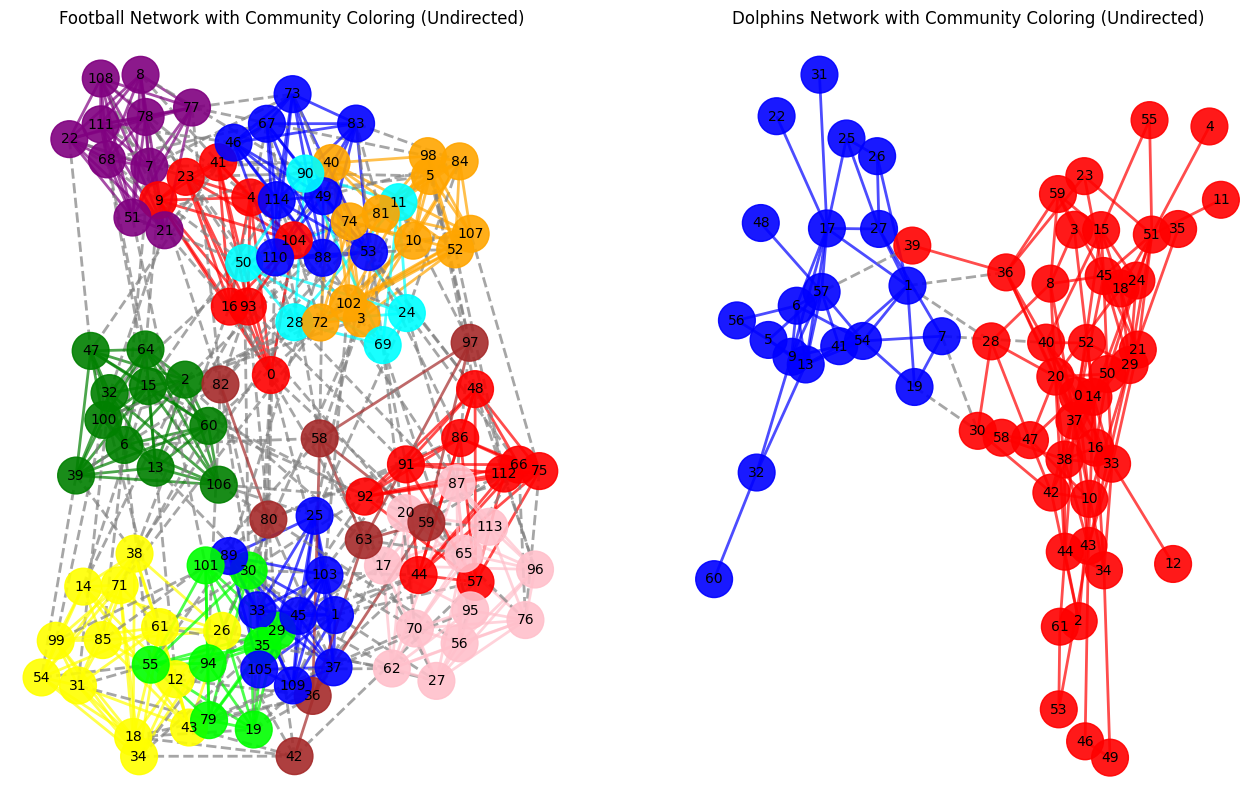

In [ ]:
football_clusters = pd.read_csv(football_cluster_file, sep='\t', header=None, names=['NodeID', 'Community'])
football_edges = pd.read_csv(football_edge_file, sep='\t', header=None, names=['Source', 'Target'])

dolphins_clusters = pd.read_csv(dolphins_cluster_file, sep='\t', header=None, names=['NodeID', 'Community'])
dolphins_edges = pd.read_csv(dolphins_edge_file, sep='\t', header=None, names=['Source', 'Target'])

# پر کردن مقدار NaN برای community
football_clusters['Community'] = football_clusters['Community'].fillna('Unknown')
dolphins_clusters['Community'] = dolphins_clusters['Community'].fillna('Unknown')

# ساخت گراف‌های بدون جهت
G_football = nx.Graph()
G_dolphins = nx.Graph()

# اضافه کردن گره‌ها و یال‌ها به گراف فوتبال
for _, row in football_clusters.iterrows():
    G_football.add_node(row['NodeID'], community=row['Community'])

for _, row in football_edges.iterrows():
    G_football.add_edge(row['Source'], row['Target'])

# اضافه کردن گره‌ها و یال‌ها به گراف دلفین‌ها
for _, row in dolphins_clusters.iterrows():
    G_dolphins.add_node(row['NodeID'], community=row['Community'])

for _, row in dolphins_edges.iterrows():
    G_dolphins.add_edge(row['Source'], row['Target'])

# تنظیم رنگ‌ها و جوامع
football_communities = football_clusters['Community'].unique()
football_colors = ['red', 'blue', 'green', 'orange', 'purple', 'cyan', 'yellow', 'pink', 'lime', 'brown']
football_community_colors = {comm: football_colors[i % len(football_colors)] for i, comm in enumerate(football_communities)}
football_community_colors['Unknown'] = 'gray'

dolphins_communities = dolphins_clusters['Community'].unique()
dolphins_colors = ['red', 'blue', 'green', 'orange', 'purple', 'cyan', 'yellow', 'pink', 'lime', 'brown']
dolphins_community_colors = {comm: dolphins_colors[i % len(dolphins_colors)] for i, comm in enumerate(dolphins_communities)}
dolphins_community_colors['Unknown'] = 'gray'

# رنگ گره‌ها
football_node_colors = [football_community_colors[G_football.nodes[node].get('community', 'Unknown')] for node in G_football.nodes]
dolphins_node_colors = [dolphins_community_colors[G_dolphins.nodes[node].get('community', 'Unknown')] for node in G_dolphins.nodes]

# تنظیم رنگ و سبک یال‌ها
football_edge_colors = []
football_edge_styles = []
for edge in G_football.edges:
    community_1 = G_football.nodes[edge[0]].get('community', 'Unknown')
    community_2 = G_football.nodes[edge[1]].get('community', 'Unknown')

    if community_1 == community_2:
        football_edge_colors.append(football_community_colors[community_1])
        football_edge_styles.append('solid')
    else:
        football_edge_colors.append('gray')
        football_edge_styles.append('dashed')

dolphins_edge_colors = []
dolphins_edge_styles = []
for edge in G_dolphins.edges:
    community_1 = G_dolphins.nodes[edge[0]].get('community', 'Unknown')
    community_2 = G_dolphins.nodes[edge[1]].get('community', 'Unknown')

    if community_1 == community_2:
        dolphins_edge_colors.append(dolphins_community_colors[community_1])
        dolphins_edge_styles.append('solid')
    else:
        dolphins_edge_colors.append('gray')
        dolphins_edge_styles.append('dashed')

# رسم گراف‌ها
fig, ax = plt.subplots(1, 2, figsize=(16, 10))

# گراف فوتبال
pos_football = nx.spring_layout(G_football)
nx.draw_networkx_nodes(G_football, pos_football, node_color=football_node_colors, node_size=700, alpha=0.9, ax=ax[0])
for edge, color, style in zip(G_football.edges, football_edge_colors, football_edge_styles):
    nx.draw_networkx_edges(G_football, pos_football, edgelist=[edge], style=style, edge_color=color, alpha=0.7, width=2, ax=ax[0])
nx.draw_networkx_labels(G_football, pos_football, font_size=10, font_color="black", ax=ax[0])
ax[0].set_title("Football Network with Community Coloring (Undirected)")
ax[0].axis("off")

# گراف دلفین‌ها
pos_dolphins = nx.spring_layout(G_dolphins)
nx.draw_networkx_nodes(G_dolphins, pos_dolphins, node_color=dolphins_node_colors, node_size=700, alpha=0.9, ax=ax[1])
for edge, color, style in zip(G_dolphins.edges, dolphins_edge_colors, dolphins_edge_styles):
    nx.draw_networkx_edges(G_dolphins, pos_dolphins, edgelist=[edge], style=style, edge_color=color, alpha=0.7, width=2, ax=ax[1])
nx.draw_networkx_labels(G_dolphins, pos_dolphins, font_size=10, font_color="black", ax=ax[1])
ax[1].set_title("Dolphins Network with Community Coloring (Undirected)")
ax[1].axis("off")

plt.show()

## Part 2 Calculations

In [ ]:
print("Calculating Degree Centrality :")
CalDegreeCent(G_football)
print("------------------------------------------------------------------------")

Calculating Degree Centrality :

Degree Centrality:
Node 0: 0.10526315789473684
Node 1: 0.10526315789473684
Node 2: 0.10526315789473684
Node 3: 0.10526315789473684
Node 4: 0.09649122807017543
Node 5: 0.10526315789473684
Node 6: 0.10526315789473684
Node 7: 0.10526315789473684
Node 8: 0.09649122807017543
Node 9: 0.09649122807017543
Node 10: 0.08771929824561403
Node 11: 0.08771929824561403
Node 12: 0.08771929824561403
Node 13: 0.09649122807017543
Node 14: 0.08771929824561403
Node 15: 0.10526315789473684
Node 16: 0.09649122807017543
Node 17: 0.09649122807017543
Node 18: 0.09649122807017543
Node 19: 0.09649122807017543
Node 20: 0.09649122807017543
Node 21: 0.09649122807017543
Node 22: 0.09649122807017543
Node 23: 0.09649122807017543
Node 24: 0.08771929824561403
Node 25: 0.09649122807017543
Node 26: 0.08771929824561403
Node 27: 0.09649122807017543
Node 28: 0.07894736842105263
Node 29: 0.09649122807017543
Node 30: 0.09649122807017543
Node 31: 0.09649122807017543
Node 32: 0.09649122807017543
N

In [ ]:
print("Calculating Betweeness Centrality :")
CalBtwnsCent(G_football)
print("------------------------------------------------------------------------")


Calculating Betweeness Centrality :

Betweenness Centrality:
Node 0: 0.03248994918389482
Node 1: 0.017621112680095283
Node 2: 0.013122497053431072
Node 3: 0.023070098856845606
Node 4: 0.010663869449409077
Node 5: 0.010660982082613544
Node 6: 0.01968128436895882
Node 7: 0.014563035979091633
Node 8: 0.005008648931669307
Node 9: 0.01183115085985048
Node 10: 0.006907991485590174
Node 11: 0.011400348520391542
Node 12: 0.010144133783987277
Node 13: 0.017291363429954684
Node 14: 0.007074447857815538
Node 15: 0.020895265847707085
Node 16: 0.022213447427560148
Node 17: 0.01660199660390932
Node 18: 0.008492946116024448
Node 19: 0.009759312735771708
Node 20: 0.02304632173060802
Node 21: 0.022126807176414888
Node 22: 0.006732525804006757
Node 23: 0.0075893356814986665
Node 24: 0.02070022463158684
Node 25: 0.01778327242869339
Node 26: 0.01700336998667973
Node 27: 0.010660261265228411
Node 28: 0.01817205827359323
Node 29: 0.009028716823683692
Node 30: 0.015086641056354317
Node 31: 0.0084175626700774

In [ ]:
print("Calculating Closeness Centrality :")
CalClosenessCent(G_football)
print("------------------------------------------------------------------------")


Calculating Closeness Centrality :

Closeness Centrality:
Node 0: 0.42379182156133827
Node 1: 0.41304347826086957
Node 2: 0.40714285714285714
Node 3: 0.42066420664206644
Node 4: 0.4028268551236749
Node 5: 0.3838383838383838
Node 6: 0.4253731343283582
Node 7: 0.4014084507042254
Node 8: 0.36075949367088606
Node 9: 0.397212543554007
Node 10: 0.38127090301003347
Node 11: 0.4028268551236749
Node 12: 0.3904109589041096
Node 13: 0.42066420664206644
Node 14: 0.38513513513513514
Node 15: 0.42379182156133827
Node 16: 0.42379182156133827
Node 17: 0.41155234657039713
Node 18: 0.38
Node 19: 0.3904109589041096
Node 20: 0.4028268551236749
Node 21: 0.397212543554007
Node 22: 0.36774193548387096
Node 23: 0.38513513513513514
Node 24: 0.42379182156133827
Node 25: 0.41304347826086957
Node 26: 0.3986013986013986
Node 27: 0.3825503355704698
Node 28: 0.40860215053763443
Node 29: 0.4
Node 30: 0.41007194244604317
Node 31: 0.3787375415282392
Node 32: 0.41007194244604317
Node 33: 0.3877551020408163
Node 34: 0.37

In [ ]:
print("Calculating Page Rank :")
CalPageRank(G_football)
print("------------------------------------------------------------------------")

Calculating Page Rank :

PageRank:
Node 0: 0.009587665333872538
Node 1: 0.009641122343366627
Node 2: 0.009508759944768679
Node 3: 0.009617056478393123
Node 4: 0.008887147707286151
Node 5: 0.009676913422795615
Node 6: 0.009548177032061969
Node 7: 0.009491069260854435
Node 8: 0.00884362443617436
Node 9: 0.008835869436120636
Node 10: 0.008212358162669305
Node 11: 0.00834494478020884
Node 12: 0.008381678816349731
Node 13: 0.008827867248461872
Node 14: 0.00832281569229662
Node 15: 0.009510385822855696
Node 16: 0.008848088413599374
Node 17: 0.009017701705371552
Node 18: 0.009131742421012693
Node 19: 0.009006459885452182
Node 20: 0.009030039689275396
Node 21: 0.008813045322493173
Node 22: 0.008812666358662832
Node 23: 0.008860672643642802
Node 24: 0.008311046832345997
Node 25: 0.008908690212626896
Node 26: 0.008392221347271134
Node 27: 0.009034800958769768
Node 28: 0.007635694541439575
Node 29: 0.00899924263835765
Node 30: 0.008960038682314285
Node 31: 0.009017891977255773
Node 32: 0.00880003

In [ ]:
RAndD(G_football)

The undirected version of the graph is connected.
Radius of the undirected network: 3
Diameter of the undirected network: 4


In [ ]:
NumOfEdgeAndNode(G_football)

Number of nodes: 115
Number of edges: 613


In [ ]:
calculate_eigenvector_centrality(graph=G_football)

{0: 0.10650322939785117,
 1: 0.09638542911769846,
 2: 0.11626189945612067,
 3: 0.10624954486445579,
 4: 0.1011902270150916,
 5: 0.1022724654014604,
 6: 0.11285571635753365,
 7: 0.12072375014454013,
 8: 0.10781145990002307,
 9: 0.10653182761728124,
 10: 0.09025788224189647,
 11: 0.07986799659559272,
 12: 0.07111456568033118,
 13: 0.10599493440730601,
 14: 0.07663083900658142,
 15: 0.116302876375951,
 16: 0.10379098941449916,
 17: 0.08178931955802218,
 18: 0.07512079745044922,
 19: 0.08348493962139775,
 20: 0.08121510679767421,
 21: 0.10996876923522053,
 22: 0.11032339044451621,
 23: 0.10448167733829596,
 24: 0.08031930443204503,
 25: 0.09337865264768185,
 26: 0.07091526556639005,
 27: 0.07951282904057867,
 28: 0.0701104990950927,
 29: 0.08576436291400143,
 30: 0.08755028811547796,
 31: 0.08255409289615032,
 32: 0.1092092904783885,
 33: 0.08336777335484145,
 34: 0.07681728596169585,
 35: 0.08845985842435759,
 36: 0.05614425482802739,
 37: 0.08603421757032984,
 38: 0.08048860896825336,
 3

فاز دوم: تحلیل نفوذ
۱. انتخاب گره‌ها بر اساس معیارهای مرکزیت
در این بخش، گره‌ها بر اساس معیارهای مختلف مرکزیت رتبه‌بندی شده و بهترین ۵ و ۱۰ گره به عنوان بذر انتخاب می‌شوند.

In [ ]:
def select_top_k_nodes(centrality_dict, k):
    sorted_nodes = sorted(centrality_dict.items(), key=lambda item: item[1], reverse=True)
    top_k_nodes = [node for node, centrality in sorted_nodes[:k]]
    return top_k_nodes

# محاسبه معیارهای مرکزیت برای فوتبال
degree_centrality = nx.degree_centrality(G_football)
closeness_centrality = nx.closeness_centrality(G_football)
betweenness_centrality = nx.betweenness_centrality(G_football)
pagerank = nx.pagerank(G_football)
eigenvector_centrality = calculate_eigenvector_centrality(G_football)

# انتخاب ۵ و ۱۰ گره بر اساس هر معیار
centrality_methods = {
    'Degree Centrality': degree_centrality,
    'Closeness Centrality': closeness_centrality,
    'Betweenness Centrality': betweenness_centrality,
    'Eigenvector Centrality': eigenvector_centrality,
    'PageRank': pagerank
}

top_seeds = {}
for method, centrality in centrality_methods.items():
    if centrality is not None:
        top_seeds[method] = {
            'Top 5': select_top_k_nodes(centrality, 5),
            'Top 10': select_top_k_nodes(centrality, 10)
        }

# نمایش گره‌های انتخاب شده
for method, selections in top_seeds.items():
    print(f"\nروش: {method}")
    print(f"Top 5 گره‌ها: {selections['Top 5']}")
    print(f"Top 10 گره‌ها: {selections['Top 10']}")



روش: Degree Centrality
Top 5 گره‌ها: [0, 1, 2, 3, 5]
Top 10 گره‌ها: [0, 1, 2, 3, 5, 6, 7, 15, 53, 67]

روش: Closeness Centrality
Top 5 گره‌ها: [58, 80, 88, 106, 6]
Top 10 گره‌ها: [58, 80, 88, 106, 6, 0, 15, 16, 24, 92]

روش: Betweenness Centrality
Top 5 گره‌ها: [82, 0, 80, 58, 38]
Top 10 گره‌ها: [82, 0, 80, 58, 38, 69, 92, 3, 20, 16]

روش: Eigenvector Centrality
Top 5 گره‌ها: [67, 53, 88, 7, 73]
Top 10 گره‌ها: [67, 53, 88, 7, 73, 46, 114, 49, 83, 15]

روش: PageRank
Top 5 گره‌ها: [5, 1, 3, 0, 6]
Top 10 گره‌ها: [5, 1, 3, 0, 6, 104, 15, 2, 88, 7]


In [ ]:
def independent_cascade_model(graph, seeds, p=0.1):
    """
    شبیه‌سازی مدل Independent Cascade

    Parameters:
    -----------
    - graph: networkx.Graph
        گراف شبکه
    - seeds: list
        لیست گره‌های بذر
    - p: float
        احتمال فعال‌سازی یال‌ها

    Returns:
    --------
    - activated_nodes: set
        مجموعه گره‌های فعال شده
    """
    # 1. همه‌ی گره‌ها را غیرآلوده تنظیم می‌کنیم
    activated = set(seeds)  # گره‌های آلوده اولیه
    newly_activated = set(seeds)  # گره‌های فعال جدید در مرحله‌ی جاری

    # 2. انتشار آلودگی تا زمانی که گره جدیدی فعال شود
    while newly_activated:
        next_activated = set()
        for node in newly_activated:
            for neighbor in graph.neighbors(node):
                if neighbor not in activated:
                    if random.random() <= p:
                        next_activated.add(neighbor)
                        activated.add(neighbor)
        newly_activated = next_activated

    return activated

def run_ic_simulation(graph, seeds, p=0.1, Iteration=50):
    """
    اجرای مدل Independent Cascade چندین بار و محاسبه میانگین نفوذ

    Parameters:
    -----------
    - graph: networkx.Graph
        گراف شبکه
    - seeds: list
        لیست گره‌های بذر
    - p: float
        احتمال فعال‌سازی یال‌ها
    - simulations: int
        تعداد تکرار شبیه‌سازی

    Returns:
    --------
    - average_spread: float
        میانگین تعداد گره‌های آلوده شده
    """
    influence_spreads = []
    for _ in range(Iteration):
        activated = independent_cascade_model(graph, seeds, p)
        influence_spreads.append(len(activated))
    average_spread = sum(influence_spreads) / Iteration
    return average_spread


۲. پیاده‌سازی مدل Independent Cascade (IC)
مدل Independent Cascade یکی از مدل‌های معروف در تحلیل نفوذ شبکه‌های اجتماعی است. در این مدل، هر گره فعال شده در یک مرحله، با احتمال مشخصی تلاش می‌کند گره‌های همسایه خود را فعال کند.

In [ ]:
def independent_cascade_model(graph, seeds, p=0.1):
    """
    شبیه‌سازی مدل Independent Cascade

    Parameters:
    - graph: گراف شبکه
    - seeds: لیست گره‌های بذر
    - p: احتمال فعال‌سازی یال‌ها

    Returns:
    - activated_nodes: مجموعه گره‌های فعال شده
    """
    activated = set(seeds)
    newly_activated = set(seeds)

    while newly_activated:
        next_activated = set()
        for node in newly_activated:
            neighbors = graph.neighbors(node)
            for neighbor in neighbors:
                if neighbor not in activated:
                    if random.random() <= p:
                        next_activated.add(neighbor)
                        activated.add(neighbor)
        newly_activated = next_activated
    return activated

def run_ic_simulation(graph, seeds, p=0.1, simulations=50):
    influence_spreads = []
    for _ in range(simulations):
        activated = independent_cascade_model(graph, seeds, p)
        influence_spreads.append(len(activated))
    average_spread = sum(influence_spreads) / simulations
    return average_spread


۳. اجرای شبیه‌سازی برای معیارهای مرکزیت
در این بخش، برای هر مجموعه بذر انتخاب شده بر اساس معیارهای مرکزیت، مدل IC را اجرا کرده و میزان نفوذ نهایی را محاسبه می‌کنیم.

In [ ]:

# ایجاد دیکشنری برای ذخیره نتایج
results = {
    'Method': [],
    'Seed Selection': [],
    'Average Spread': []
}

# تنظیم پارامترهای مدل IC
p = 0.1
Iteration = 50

for method, selections in top_seeds.items():
    for seed_size, seeds in selections.items():
        spread = run_ic_simulation(G_football, seeds, p, Iteration)
        results['Method'].append(method)
        results['Seed Selection'].append(seed_size)
        results['Average Spread'].append(spread)
        print(f"{method} - {seed_size}: {spread}")
print("------------------------------------------------------------------------")


Degree Centrality - Top 5: 23.78
Degree Centrality - Top 10: 40.6
Closeness Centrality - Top 5: 25.96
Closeness Centrality - Top 10: 36.84
Betweenness Centrality - Top 5: 23.62
Betweenness Centrality - Top 10: 41.72
Eigenvector Centrality - Top 5: 19.64
Eigenvector Centrality - Top 10: 26.2
PageRank - Top 5: 27.88
PageRank - Top 10: 39.82
------------------------------------------------------------------------


۴. پیاده‌سازی الگوریتم حریصانه (Greedy Algorithm)
الگوریتم حریصانه برای انتخاب بذرها به گونه‌ای عمل می‌کند که در هر مرحله گره‌ای را انتخاب می‌کند که بیشترین تاثیر را نسبت به بقیه داشته باشد.

In [ ]:
def greedy_algorithm(graph, k, p=0.1, Iteration=50):
    selected_seeds = set()
    max_spread = 0

    for _ in range(k):
        best_node = None
        best_spread = -1
        for node in set(graph.nodes) - selected_seeds:
            current_seeds = selected_seeds | {node}
            spread = run_ic_simulation(graph, current_seeds, p, Iteration)
            if spread > best_spread:
                best_spread = spread
                best_node = node
        if best_node is not None:
            selected_seeds.add(best_node)
            max_spread = best_spread
    return list(selected_seeds), max_spread

# انتخاب ۵ و ۱۰ گره با الگوریتم حریصانه
print("اجرای الگوریتم حریصانه برای انتخاب ۵ گره:")
greedy_seeds_5, spread_greedy_5 = greedy_algorithm(G_football, 5, p, Iteration)
print(f"بذرهای انتخاب شده: {greedy_seeds_5}")
print(f"میانگین نفوذ: {spread_greedy_5}")
print("------------------------------------------------------------------------")

print("اجرای الگوریتم حریصانه برای انتخاب ۱۰ گره:")
greedy_seeds_10, spread_greedy_10 = greedy_algorithm(G_football, 10, p, Iteration)
print(f"بذرهای انتخاب شده: {greedy_seeds_10}")
print(f"میانگین نفوذ: {spread_greedy_10}")
print("------------------------------------------------------------------------")

# افزودن نتایج الگوریتم حریصانه به دیکشنری نتایج
results['Method'].append('Greedy Algorithm')
results['Seed Selection'].append('Top 5')
results['Average Spread'].append(spread_greedy_5)

results['Method'].append('Greedy Algorithm')
results['Seed Selection'].append('Top 10')
results['Average Spread'].append(spread_greedy_10)


اجرای الگوریتم حریصانه برای انتخاب ۵ گره:
بذرهای انتخاب شده: [1, 75, 53, 22, 31]
میانگین نفوذ: 32.36
------------------------------------------------------------------------
اجرای الگوریتم حریصانه برای انتخاب ۱۰ گره:
بذرهای انتخاب شده: [96, 33, 35, 99, 6, 7, 104, 75, 88, 29]
میانگین نفوذ: 45.74
------------------------------------------------------------------------


۵. نمایش نتایج
در این بخش، نتایج شبیه‌سازی‌های انجام شده را در قالب جدول و نمودار نمایش می‌دهیم تا بتوانید تاثیر هر روش را به راحتی مقایسه کنید.

In [ ]:
# تبدیل نتایج به DataFrame
df_results = pd.DataFrame(results)

# نمایش جدول نتایج
print("جدول نتایج شبیه‌سازی نفوذ:")
print(df_results)


جدول نتایج شبیه‌سازی نفوذ:
                    Method Seed Selection  Average Spread
0        Degree Centrality          Top 5           23.78
1        Degree Centrality         Top 10           40.60
2     Closeness Centrality          Top 5           25.96
3     Closeness Centrality         Top 10           36.84
4   Betweenness Centrality          Top 5           23.62
5   Betweenness Centrality         Top 10           41.72
6   Eigenvector Centrality          Top 5           19.64
7   Eigenvector Centrality         Top 10           26.20
8                 PageRank          Top 5           27.88
9                 PageRank         Top 10           39.82
10        Greedy Algorithm          Top 5           32.36
11        Greedy Algorithm         Top 10           45.74


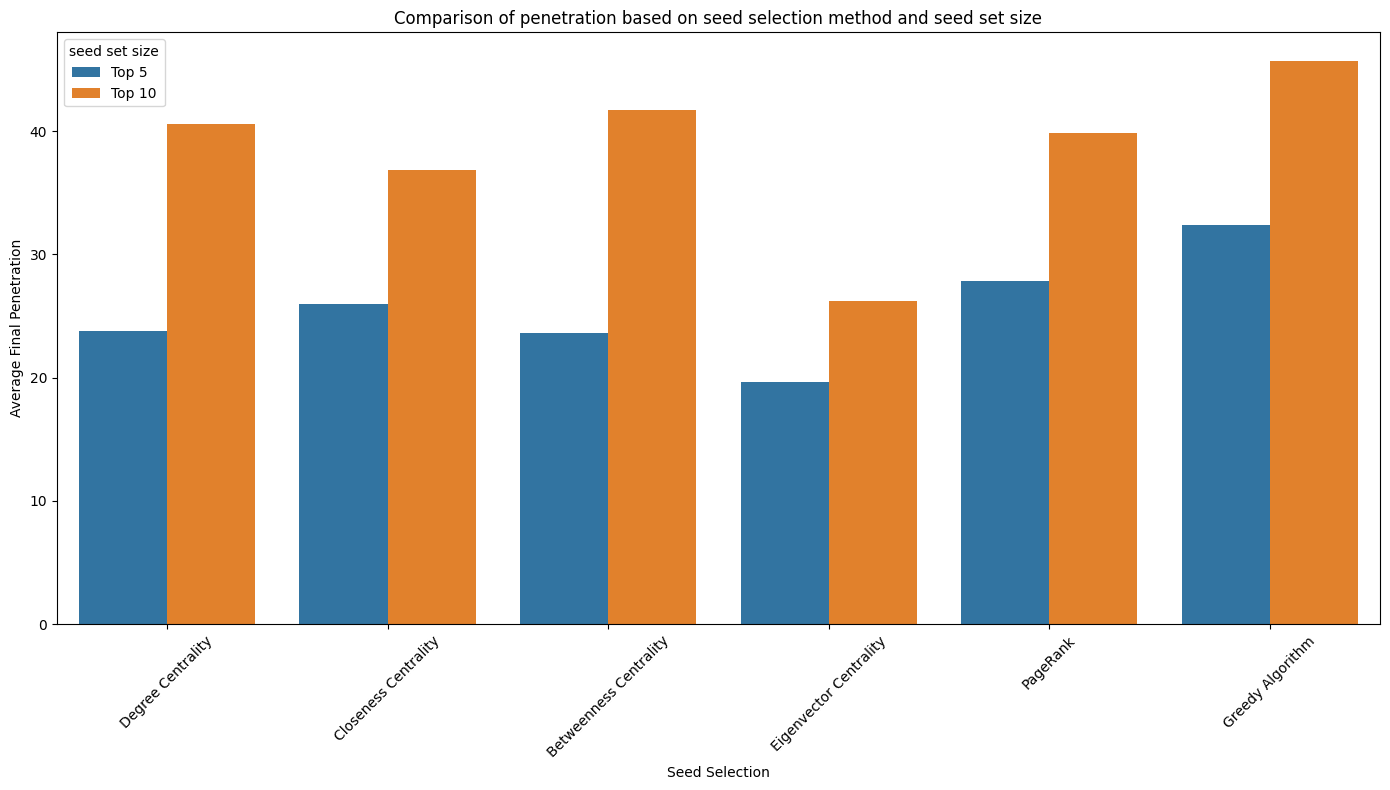

In [ ]:
# رسم نمودار مقایسه‌ای

plt.figure(figsize=(14,8))
sns.barplot(x='Method', y='Average Spread', hue='Seed Selection', data=df_results)
plt.title('Comparison of penetration based on seed selection method and seed set size')
plt.xlabel('Seed Selection')
plt.ylabel('Average Final Penetration')
plt.xticks(rotation=45)
plt.legend(title='seed set size')
plt.tight_layout()
plt.show()
